#### IMPORT

In [1]:
import os, platform

from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

from matplotlib import pyplot


from keras.utils.np_utils import to_categorical 
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout, \
    BatchNormalization, Flatten, LSTM
# from scikeras.wrappers import KerasClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import load_model

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc


from sklearn.metrics import roc_curve, auc

from itertools import cycle
from scipy import interp
from scipy.optimize import brentq
from scipy.interpolate import interp1d

#### PARAMETERS
- Set the condition
> * N_FEATURES: Number of Features
> * CHECK_BLANKS: Check for blank data. If any blank data is found, the whole row of data will be deleted.
> * CHECK_CLASS_IMBALANCE: Check for dataset class imbalance. The more balance the dataset, the less biases the model will be.

In [2]:
##############################
# # deep learning features # #
##############################
SEED = 1005 # random seed for reproducibility

# should make this dynamic
N_FEATURES = 37 #644 #322 #644 #37 #644 #37 #98 #190 #61 #37 #46
# N_CLASSES=3
TIMESTEPS = 1
EPOCH=200
BATCH_SIZE=10

SPLIT_RATIO=0.2

###############
# # preview # #
###############
f = False
t = True

# checking dataset
CHECK_BLANKS = True
CHECK_CLASS_IMBALANCE = True

# evaluate suitable kfold number and kfold model
MIN_KFOLD = 2
MAX_KFOLD = 11
N_KFOLD = 5
EVAL_KFOLD_NUM = False
EVAL_KFOLD_MODEL = False
PERFORM_KFOLD = True

# model testing
TEST_MODEL = False
CON_MATRIX = False
ROC_GRAPH = False

###############
# # dataset # #
###############
DATASET_DIR_NAME = "dataset"
SAMPLE_DATASET_NAME = "train" + ".csv"
ACTUAL_DATASET_NAME = "test" + ".csv"

# SAMPLE_DATASET_NAME = "train_m2m_tengraph" + ".csv"
# ACTUAL_DATASET_NAME = "test_m2m_tengraph" + ".csv"

# SAMPLE_DATASET_NAME = "andy" + ".csv"
# ACTUAL_DATASET_NAME = "andy" + ".csv"

MODEL_DIR_NAME = "model"
MODEL_NAME = "classifier_del" + ".h5"

RESULT_NAME = "own_full_v4" + ".csv"

DATASET_DIR_PATH = os.path.join(os.getcwd(), DATASET_DIR_NAME)
SAMPLE_DATASET_PATH = os.path.join(DATASET_DIR_PATH, SAMPLE_DATASET_NAME)
ACTUAL_DATASET_PATH = os.path.join(DATASET_DIR_PATH, ACTUAL_DATASET_NAME)

MODEL_DIR_PATH = os.path.join(os.getcwd(), MODEL_DIR_NAME)
MODEL_PATH = os.path.join(MODEL_DIR_PATH, MODEL_NAME)

CLASSES_COL_NAME = "Subject"
CLASSES_COL_NUM = 0
FEATURES_COL_NUM = 3

CLASS_LIST = ['andy', 'azfar', 'ch', 'cy', 'gerald', 'jc', 'jonah', 'qikai', 'ys', 'zen']

#################
# # sns theme # #
#################
# sns.set_theme(style="darkgrid") # (dark background with white gridlines)
sns.set_theme(style="whitegrid") # (white background with grey gridlines)
# sns.set_theme(style="dark") # (dark background with no gridlines)
# sns.set_theme(style="white") # (white background with no gridlines)
# sns.set_theme(style="ticks") # (white background with axis ticks and no gridlines)

NameError: name 'os' is not defined

In [ ]:
if os.path.isdir(DATASET_DIR_PATH) is True:
    print(f"Dataset directory exists at: {DATASET_DIR_PATH}")
    pass
else:
    try:
        os.mkdir(DATASET_DIR_PATH, 666)
        print(f"Dataset directory have been created at: {DATASET_DIR_PATH}")
    except:
        print("Error: Dataset Directory not created")
        
if os.path.isdir(MODEL_DIR_PATH) is True:
    print(f"Model directory exists at: {MODEL_DIR_PATH}")
    pass
else:
    try:
        os.mkdir(MODEL_DIR_PATH, 666)
        print(f"Model directory have been created at: {MODEL_DIR_PATH}")
    except:
        print("Error: Model Directory not created")

#### CREATE MODEL
- Create base model
- Wrap it with KerasClassifier

In [4]:
# create base model
# def create_base_model():
#     model = Sequential()
#     model.add(LSTM(units=1024, return_sequences=True,
#              input_shape=(TIMESTEPS,N_FEATURES)))
#     model.add(Dropout(0.2))
#     model.add(BatchNormalization())
#     model.add(LSTM(units=512, return_sequences=True))
#     model.add(Dropout(0.2))
#     model.add(LSTM(units=256, return_sequences=True))
#     model.add(Dropout(0.2))
# #     model.add(LSTM(units=128, return_sequences=True))
# #     model.add(Dropout(0.2))
# #     model.add(LSTM(units=128, return_sequences=True))
# #     model.add(Dropout(0.2))
# #     model.add(LSTM(units=128, return_sequences=True))
# #     model.add(BatchNormalization())
# #     model.add(LSTM(units=64, return_sequences=True))
# #     model.add(Dropout(0.2))
# #     model.add(LSTM(units=32, return_sequences=True))
# #     model.add(Dropout(0.2))
#     model.add(BatchNormalization())
#     # softmax for multi-class classification
#     model.add(Flatten())
#     print(n_classes)
#     model.add(Dense(n_classes, activation='softmax'))

#     model.compile(loss='categorical_crossentropy', optimizer='adam',
#                 metrics=['accuracy'])
#     return model

#create base model
def create_base_model():
    model = Sequential()
    model.add(LSTM(units=128, return_sequences=True,
             input_shape=(TIMESTEPS,N_FEATURES)))
    model.add(Dense(128, activation='sigmoid'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    
    model.add(LSTM(units=64, return_sequences=True))
    model.add(Dense(64, activation='sigmoid'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    
    model.add(LSTM(units=32, return_sequences=True))
    model.add(Dense(32, activation='sigmoid'))
    model.add(Dropout(0.2))
    
    # softmax for multi-class classification
    model.add(Flatten())
    print(n_classes)
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',
                metrics=['accuracy'])
    return model

# wrap model in KerasClassifier
def create_model():
    model = KerasClassifier(build_fn=create_base_model, epochs=EPOCH, 
                            batch_size=BATCH_SIZE)
    return model



In [5]:
# divide data into features X and target (classes) Y
def prepare_dataset(df):
    X = df.values[:,FEATURES_COL_NUM:].astype(float)
    Y = df.values[:,CLASSES_COL_NUM].astype(str)

    # convert target Y to labelbinarizer Y for model
    # fit_transform is not used to reuse lb
    Y = Y.reshape(-1, 1)
    lb = LabelBinarizer().fit(Y)
    Y = lb.transform(Y)


    #################################
    # # get all the encoded class # #
    #################################
    print("LabelBinarizer is able to decipher: ")
    print(lb.classes_)
    print("\n")

    ###########################
    # # print X and Y shape # #
    ###########################
    print(f"X | Features | Dataset Shape: {X.shape}")
    print(f"Y | Classes  | Dataset Shape: {Y.shape}")

    return X, Y, lb

In [6]:
def split_shape_dataset(X, Y, SPLIT_RATIO, TIMESTEPS, SEED):

    ##############################################################
    # # split dataset into train and test set of 0.8/0.2 ratio # #
    ##############################################################
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=SPLIT_RATIO, random_state=SEED)

    ############################
    # # reshaping of dataset # #
    ############################

    # reshaping the dataset to include LSTM Timesteps
    print(X_train.dtype)
    X_train = np.asarray(X_train, dtype=np.float32)
    print(X_train.dtype)
    X_train = np.reshape(X_train, (X_train.shape[0], TIMESTEPS, X_train.shape[1]))
    print(X_test.dtype)
    X_test = np.asarray(X_test, dtype=np.float32)
    print(X_test.dtype)
    X_test = np.reshape(X_test, (X_test.shape[0], TIMESTEPS, X_test.shape[1]))

    # retrieve number of classes
    n_classes = y_train.shape[1]

    print(f"X train shape: {X_train.shape}")
    print(f"Y train shape: {y_train.shape}")
    print(f"X test shape: {X_test.shape}")
    print(f"Y test shape: {y_test.shape}")
    print(f"Number of Classes: {n_classes}")

    return X_train, X_test, y_train, y_test, n_classes

def reshape_dataset(X, TIMESTEPS):
    # reshaping the dataset to include LSTM Timesteps
    X = np.asarray(X, dtype=np.float32)
    X = np.reshape(X, (X.shape[0], TIMESTEPS, X.shape[1]))
    return X


#### LOAD DATASET

In [7]:
# load dataset
df = pd.read_csv(SAMPLE_DATASET_PATH)



# df.drop(df[df['Subject']=='andy'].index, inplace=True)
# df.drop(df[df['Subject']=='azfar'].index, inplace=True)
# df.drop(df[df['Subject']=='ch'].index, inplace=True)
# df.drop(df[df['Subject']=='cy'].index, inplace=True)
# df.drop(df[df['Subject']=='gerald'].index, inplace=True)
# df.drop(df[df['Subject']=='jc'].index, inplace=True)
# df.drop(df[df['Subject']=='jonah'].index, inplace=True)
# df.drop(df[df['Subject']=='qikai'].index, inplace=True)
# df.drop(df[df['Subject']=='ys'].index, inplace=True)
# df.drop(df[df['Subject']=='zen'].index, inplace=True)

# CLASS_LIST = ['andy', 'azfar', 'ch', 'cy', 'gerald', 'jc', 'jonah', 'qikai', 'ys', 'zen']
# CLASS_LIST = ['ch', 'cy', 'jc', 'ys', 'zen']
# CLASS_LIST = ['andy', 'azfar', 'ch', 'cy']

df.head()

,Subject,Class,Sequence,D|0,I|0+1,PF|0+1,RF|0+1,D|1,I|1+2,PF|1+2,...,RF|6+7,D|7,I|7+8,PF|7+8,RF|7+8,D|8,I|8+9,PF|8+9,RF|8+9,D|9
0,andy,3,mad wabble,0.155289,0.234703,0.091736,0.079413,0.142967,0.238084,0.072560,...,0.165704,0.119107,0.171939,0.040368,0.052832,0.131571,0.188983,0.075754,0.057412,0.113230
1,andy,3,bad reread,0.116150,0.285436,0.085726,0.169286,0.199709,0.248351,0.127091,...,0.076081,0.160108,0.271197,0.069895,0.111089,0.201302,0.291623,0.135957,0.090321,0.155666
2,andy,3,ink sienna,0.118185,0.273710,0.114184,0.155524,0.159526,0.248386,0.106931,...,0.196050,0.086095,0.257720,0.139502,0.171624,0.118217,0.253027,0.124216,0.134809,0.128811
3,andy,3,ion doxies,0.082255,0.330661,0.189420,0.248406,0.141242,0.283131,0.142228,...,0.124682,0.141366,0.203498,0.086235,0.062132,0.117263,0.199387,0.054129,0.082124,0.145257
4,andy,3,hey plains,0.106697,0.214285,0.117489,0.107588,0.096796,0.225085,0.090808,...,0.109095,0.125539,0.198049,0.046005,0.072510,0.152043,0.221190,0.082523,0.069147,0.138667


#### CHECK DATASET

Checking for blanks...
No blank value has been found.
Checking for class imbalance...


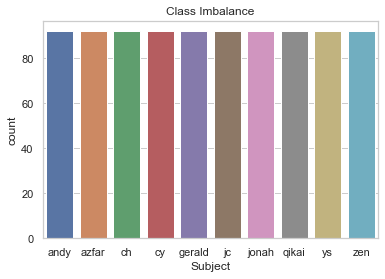

In [8]:
########################
# # check for blanks # #
########################
if CHECK_BLANKS is True:
    # checking for blanks
    print("Checking for blanks...")
    if df.isnull().values.any() is True:
        df = df.dropna(axis=0, how="any")
        print("Blank rows has been dropped.")
    else:
        print("No blank value has been found.")
        
#################################
# # check for class imbalance # #
#################################
if CHECK_CLASS_IMBALANCE is True:
    print("Checking for class imbalance...")
    sns.countplot(x=CLASSES_COL_NAME, data=df).set_title("Class Imbalance")
#     df.loc[(df!=0).any(axis=1)]
    plt.show()


#     sns.catplot(x="Subject", y="D|0", data=df)

    
#     sns.catplot(x="Subject", y="D|1", hue="D|1", data=df, legend=False)
#     sns.catplot(x="Subject", y="D|3", hue="D|3", data=df, legend=False)
#     sns.catplot(x="Subject", y="D|4", hue="D|4", data=df, legend=False)
#     sns.catplot(x="Subject", y="D|5", hue="D|5", data=df, legend=False)
#     sns.catplot(x="Subject", y="D|6", hue="D|6", data=df, legend=False)
#     sns.catplot(x="Subject", y="D|7", hue="D|7", data=df, legend=False)
#     sns.catplot(x="Subject", y="D|8", hue="D|8", data=df, legend=False)

#     sns.catplot(x="Subject", y="D|1", hue="D|1", data=df, legend=False)
#     sns.catplot(x="Subject", y="I|1+2", hue="I|1+2", data=df, legend=False)
#     sns.catplot(x="Subject", y="PF|1+2", hue="PF|1+2", data=df, legend=False)
#     sns.catplot(x="Subject", y="RF|1+2", hue="RF|1+2", data=df, legend=False)
#     sns.catplot(x="Subject", y="DT|1+2", hue="DT|1+2", data=df, legend=False)
#     sns.catplot(x="Subject", y="D|9", hue="D|9", data=df, legend=False)


#     sns.catplot(x="Subject", y="TT|1+3", hue="TT|1+3", data=df, legend=False)
#     sns.catplot(x="Subject", y="QT|1+4", hue="QT|1+4", data=df, legend=False)
    

#### PREPARE DATASET
- Split data based on X / Features and Y / Classes
- Binarize Y into binary labels

In [9]:
X, Y, lb = prepare_dataset(df)

LabelBinarizer is able to decipher: 
['andy' 'azfar' 'ch' 'cy' 'gerald' 'jc' 'jonah' 'qikai' 'ys' 'zen']


X | Features | Dataset Shape: (920, 37)
Y | Classes  | Dataset Shape: (920, 10)


#### SPLIT DATASET
- Split dataset into train set and test set 0.8 / 0.2

In [10]:
##############################################################
# # split dataset into train and test set of 0.8/0.2 ratio # #
##############################################################
X_train, X_test, y_train, y_test, n_classes = split_shape_dataset(X, Y, SPLIT_RATIO, TIMESTEPS, SEED)

float64
float32
float64
float32
X train shape: (736, 1, 37)
Y train shape: (736, 10)
X test shape: (184, 1, 37)
Y test shape: (184, 10)
Number of Classes: 10


#### PERFORM VALIDATION (w KFold Validation)
- Evaluate best KFold Validation
- Generate loss and accuracy graph
- Perform KFold validation

##### Evaluate suitable folds for kfold validation

In [11]:
###############################################
# # evaluate suitable kfold value for model # #
###############################################
def evaluate_kfold(X_train, y_train, SEED, MIN_KFOLD, MAX_KFOLD):
    
    # evaluate the model    
    folds = range(MIN_KFOLD, MAX_KFOLD)
    means, mins, maxs = list(), list(), list()
    
    # evaluate each k value
    for k in folds:
        # define the test condition
        kfold = KFold(n_splits=k, shuffle=True, random_state=SEED)
        
        # evaluate k value
        model = create_model()
        scores = cross_val_score(model, X_train, y_train, cv=kfold, n_jobs=-1)
        
        k_mean = np.mean(scores)
        k_min = scores.min()
        k_max = scores.max()
        
        # report performance
        print(f"No. of Folds: {k} | Accuracy: {k_mean*100:.3f} | Min: {k_min*100:.3f} | Max: {k_max*100:.3f}")
        
        # store mean accuracy and min and max relative to the mean
        means.append(k_mean)
        mins.append(k_mean - k_min)
        maxs.append(k_max - k_mean)
        
    # line plot of k mean values with min/max error bars
    clear_output(wait=True)
    pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
    
    # show the plot
    pyplot.show()
    
if EVAL_KFOLD_NUM is True:
    evaluate_kfold(X_train, y_train, SEED, MIN_KFOLD, MAX_KFOLD)
else:
    print("EVAL_KFOLD_NUM is not True")

EVAL_KFOLD_NUM is not True


##### Generate kfold validation accuracy and loss

In [12]:
##################################################
# # evaluate kfold model for accuracy and loss # #
##################################################
def evaluate_kfold_model(X_train, y_train, SEED):
    scores, histories = list(), list()
    # create model
    model = create_model()
    # prepare cross validation
    kfold = KFold(n_splits=5, shuffle=True, random_state=SEED)
    # enumerate splits
    for train_ix, test_ix in kfold.split(X_train):
        # select rows for train and test
        trainX, trainY, testX, testY = X_train[train_ix], y_train[train_ix], X_train[test_ix], y_train[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=100, batch_size=50, validation_data=(testX, testY), verbose=0)
        
        # evaluate model
        y_pred = model.predict(testX)
        y_pred = to_categorical(y_pred)

        # evaluate predictions
        acc = accuracy_score(testY, y_pred)
        print("Testing accuracy: %.3f%%" % (acc*100))

        # stores scores and histories
        scores.append(acc)
        histories.append(history)

    for i in range(len(histories)):
        # plot loss
        f1 = plt.figure(1)
        plt.title('Categorical Cross-Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue')
        plt.plot(histories[i].history['val_loss'], color='orange')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper right')

        # plot accuracy
        f2 = plt.figure(2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue')
        plt.plot(histories[i].history['val_accuracy'], color='orange')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='lower right')

    # print summary
    print(f"Accuracy | Mean: {np.mean(scores)*100:.3f} | Std: {np.std(scores)*100:.3f} | Length/no.: {len(scores)}")
    # box and whisker plots of results
    f3 = plt.figure(3)
    plt.title('Box and Whisker Plot of Accuracy Scores')
    plt.ylabel('accuracy')
    plt.xlabel('model')
    plt.boxplot(scores)
    clear_output(wait=True)
    plt.show()
    
if EVAL_KFOLD_MODEL is True:
    evaluate_kfold_model(X_train, y_train, SEED)
else:
    print("EVAL_KFOLD_MODEL is not true")

EVAL_KFOLD_MODEL is not true


##### Perform Actual KFold validation

In [13]:
if PERFORM_KFOLD is True:
    # create model
    model = create_model()
    kfold = KFold(n_splits=N_KFOLD, shuffle=True, random_state=SEED)
    valid_score = cross_val_score(model, X_train, y_train, 
                          cv=kfold, error_score="raise", verbose=0)
else:
    print("PERFORM_KFOLD is not true.")

10
Epoch 1/200
59/59 [==============================] - 5s 7ms/step - loss: 2.3897 - accuracy: 0.0833
Epoch 2/200
59/59 [==============================] - 0s 5ms/step - loss: 2.3624 - accuracy: 0.0782
Epoch 3/200
59/59 [==============================] - 0s 6ms/step - loss: 2.3600 - accuracy: 0.1020
Epoch 4/200
59/59 [==============================] - 0s 5ms/step - loss: 2.3501 - accuracy: 0.0782
Epoch 5/200
59/59 [==============================] - 0s 4ms/step - loss: 2.3197 - accuracy: 0.1190
Epoch 6/200
59/59 [==============================] - 0s 5ms/step - loss: 2.3319 - accuracy: 0.0884
Epoch 7/200
59/59 [==============================] - 0s 5ms/step - loss: 2.2800 - accuracy: 0.1378
Epoch 8/200
59/59 [==============================] - 0s 5ms/step - loss: 2.2285 - accuracy: 0.1769
Epoch 9/200
59/59 [==============================] - 0s 6ms/step - loss: 2.1810 - accuracy: 0.1701
Epoch 10/200
59/59 [==============================] - 0s 7ms/step - loss: 2.1274 - accuracy: 0.2041
Epoch 

Epoch 83/200
59/59 [==============================] - 0s 6ms/step - loss: 1.3473 - accuracy: 0.4949
Epoch 84/200
59/59 [==============================] - 0s 5ms/step - loss: 1.3828 - accuracy: 0.4830
Epoch 85/200
59/59 [==============================] - 0s 6ms/step - loss: 1.3387 - accuracy: 0.4983
Epoch 86/200
59/59 [==============================] - 0s 6ms/step - loss: 1.3566 - accuracy: 0.4813
Epoch 87/200
59/59 [==============================] - 0s 6ms/step - loss: 1.3653 - accuracy: 0.4898
Epoch 88/200
59/59 [==============================] - 0s 6ms/step - loss: 1.3609 - accuracy: 0.4898
Epoch 89/200
59/59 [==============================] - 0s 5ms/step - loss: 1.3389 - accuracy: 0.4881
Epoch 90/200
59/59 [==============================] - 0s 5ms/step - loss: 1.3379 - accuracy: 0.5136
Epoch 91/200
59/59 [==============================] - 0s 5ms/step - loss: 1.3365 - accuracy: 0.4762
Epoch 92/200
59/59 [==============================] - 0s 5ms/step - loss: 1.3567 - accuracy: 0.4762


59/59 [==============================] - 0s 6ms/step - loss: 1.5491 - accuracy: 0.3786
Epoch 45/200
59/59 [==============================] - 0s 6ms/step - loss: 1.5622 - accuracy: 0.4143
Epoch 46/200
59/59 [==============================] - 0s 6ms/step - loss: 1.5710 - accuracy: 0.3786
Epoch 47/200
59/59 [==============================] - 0s 5ms/step - loss: 1.5481 - accuracy: 0.4211
Epoch 48/200
59/59 [==============================] - 0s 6ms/step - loss: 1.5439 - accuracy: 0.4075
Epoch 49/200
59/59 [==============================] - 0s 6ms/step - loss: 1.5221 - accuracy: 0.4058
Epoch 50/200
59/59 [==============================] - 0s 6ms/step - loss: 1.5086 - accuracy: 0.3871
Epoch 51/200
59/59 [==============================] - 0s 6ms/step - loss: 1.4904 - accuracy: 0.4295
Epoch 52/200
59/59 [==============================] - 0s 5ms/step - loss: 1.5060 - accuracy: 0.4363
Epoch 53/200
59/59 [==============================] - 0s 6ms/step - loss: 1.5345 - accuracy: 0.4261
Epoch 54/200


59/59 [==============================] - 0s 6ms/step - loss: 2.3197 - accuracy: 0.1171
Epoch 6/200
59/59 [==============================] - 0s 6ms/step - loss: 2.2680 - accuracy: 0.1511
Epoch 7/200
59/59 [==============================] - 0s 7ms/step - loss: 2.2121 - accuracy: 0.1630
Epoch 8/200
59/59 [==============================] - 0s 6ms/step - loss: 2.1294 - accuracy: 0.2003
Epoch 9/200
59/59 [==============================] - 0s 6ms/step - loss: 2.1269 - accuracy: 0.1817
Epoch 10/200
59/59 [==============================] - 0s 6ms/step - loss: 2.0804 - accuracy: 0.2071
Epoch 11/200
59/59 [==============================] - 0s 6ms/step - loss: 2.0494 - accuracy: 0.1851
Epoch 12/200
59/59 [==============================] - 0s 6ms/step - loss: 2.0584 - accuracy: 0.1868
Epoch 13/200
59/59 [==============================] - 0s 6ms/step - loss: 2.0478 - accuracy: 0.1834
Epoch 14/200
59/59 [==============================] - 0s 6ms/step - loss: 2.0385 - accuracy: 0.2020
Epoch 15/200
59/5

59/59 [==============================] - 0s 5ms/step - loss: 1.4113 - accuracy: 0.4601
Epoch 88/200
59/59 [==============================] - 0s 5ms/step - loss: 1.3258 - accuracy: 0.4907
Epoch 89/200
59/59 [==============================] - 0s 5ms/step - loss: 1.3780 - accuracy: 0.4567
Epoch 90/200
59/59 [==============================] - 0s 5ms/step - loss: 1.3365 - accuracy: 0.4856
Epoch 91/200
59/59 [==============================] - 0s 5ms/step - loss: 1.3723 - accuracy: 0.4890
Epoch 92/200
59/59 [==============================] - 0s 5ms/step - loss: 1.3836 - accuracy: 0.4584
Epoch 93/200
59/59 [==============================] - 0s 5ms/step - loss: 1.3439 - accuracy: 0.4924
Epoch 94/200
59/59 [==============================] - 0s 6ms/step - loss: 1.3218 - accuracy: 0.4975
Epoch 95/200
59/59 [==============================] - 0s 7ms/step - loss: 1.3511 - accuracy: 0.4839
Epoch 96/200
59/59 [==============================] - 0s 6ms/step - loss: 1.3326 - accuracy: 0.4822
Epoch 97/200


59/59 [==============================] - 0s 6ms/step - loss: 1.4538 - accuracy: 0.4363
Epoch 49/200
59/59 [==============================] - 0s 6ms/step - loss: 1.4858 - accuracy: 0.4380
Epoch 50/200
59/59 [==============================] - 0s 6ms/step - loss: 1.4689 - accuracy: 0.4533
Epoch 51/200
59/59 [==============================] - 0s 6ms/step - loss: 1.4679 - accuracy: 0.4244
Epoch 52/200
59/59 [==============================] - 0s 6ms/step - loss: 1.4603 - accuracy: 0.4499
Epoch 53/200
59/59 [==============================] - 0s 6ms/step - loss: 1.4076 - accuracy: 0.4482
Epoch 54/200
59/59 [==============================] - 0s 6ms/step - loss: 1.4162 - accuracy: 0.4669
Epoch 55/200
59/59 [==============================] - 0s 6ms/step - loss: 1.4271 - accuracy: 0.4414
Epoch 56/200
59/59 [==============================] - 0s 5ms/step - loss: 1.4593 - accuracy: 0.4550
Epoch 57/200
59/59 [==============================] - 0s 5ms/step - loss: 1.4436 - accuracy: 0.4465
Epoch 58/200


59/59 [==============================] - 0s 8ms/step - loss: 2.2727 - accuracy: 0.1358
Epoch 10/200
59/59 [==============================] - 0s 7ms/step - loss: 2.2424 - accuracy: 0.1596
Epoch 11/200
59/59 [==============================] - 1s 9ms/step - loss: 2.1631 - accuracy: 0.1800
Epoch 12/200
59/59 [==============================] - 1s 10ms/step - loss: 2.1015 - accuracy: 0.2088
Epoch 13/200
59/59 [==============================] - 1s 13ms/step - loss: 2.0587 - accuracy: 0.2156
Epoch 14/200
59/59 [==============================] - 1s 10ms/step - loss: 2.0036 - accuracy: 0.2292
Epoch 15/200
59/59 [==============================] - 0s 7ms/step - loss: 1.9503 - accuracy: 0.2784
Epoch 16/200
59/59 [==============================] - 1s 9ms/step - loss: 1.9002 - accuracy: 0.2818
Epoch 17/200
59/59 [==============================] - 0s 7ms/step - loss: 1.8795 - accuracy: 0.3090
Epoch 18/200
59/59 [==============================] - 1s 9ms/step - loss: 1.8065 - accuracy: 0.3056
Epoch 19/2

59/59 [==============================] - 0s 5ms/step - loss: 1.3752 - accuracy: 0.4652
Epoch 92/200
59/59 [==============================] - 0s 5ms/step - loss: 1.3446 - accuracy: 0.4771
Epoch 93/200
59/59 [==============================] - 0s 5ms/step - loss: 1.3182 - accuracy: 0.5008
Epoch 94/200
59/59 [==============================] - 0s 5ms/step - loss: 1.3526 - accuracy: 0.4839
Epoch 95/200
59/59 [==============================] - 0s 6ms/step - loss: 1.3272 - accuracy: 0.4992
Epoch 96/200
59/59 [==============================] - 0s 6ms/step - loss: 1.2987 - accuracy: 0.4822
Epoch 97/200
59/59 [==============================] - 0s 5ms/step - loss: 1.2989 - accuracy: 0.4975
Epoch 98/200
59/59 [==============================] - 0s 5ms/step - loss: 1.3061 - accuracy: 0.5178
Epoch 99/200
59/59 [==============================] - 0s 5ms/step - loss: 1.3173 - accuracy: 0.5042
Epoch 100/200
59/59 [==============================] - 0s 5ms/step - loss: 1.2845 - accuracy: 0.5076
Epoch 101/20

##### Get Validation Accuracy

In [14]:
if PERFORM_KFOLD is True:
    print("Validation Accuracy of %.2f%% (with standard deviation of %.2f%%)" % 
      (valid_score.mean()*100, valid_score.std()*100))
else:
    print("PERFORM_KFOLD is not true.")

Validation Accuracy of 53.52% (with standard deviation of 5.24%)


#### FIT MODEL FOR TESTING
- Fit the Model
- View Accuracy and Loss Graph
- View Model Summary

In [15]:
#####################
# # fit the model # #
#####################

if TEST_MODEL is True:
    model = create_model()
    es = EarlyStopping(monitor='loss', mode='min', min_delta=0.001, patience=50,
                       verbose=1)
    history = model.fit(X_train, y_train, callbacks=es, verbose=1)

In [16]:
if TEST_MODEL is True:
    ##########################
    # # get model accuracy # #
    ##########################
    plt.plot(history.history['accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()

    ######################
    # # get model loss # #
    ######################
    plt.plot(history.history['loss'])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()

In [17]:
if TEST_MODEL is True:
    ##########################
    # # view model summary # #
    ##########################
    model.model.summary()

#### MODEL TESTING
- Get Model Accuracy on the Test Dataset
- Generate Confusion Matrix
- Generate ROC Curves
- Save the Model if Appropriate

In [18]:
if TEST_MODEL is True:
    y_pred = model.predict_proba(X_test)

    # evaluate predictions
    acc = accuracy_score(lb.inverse_transform(y_test), lb.inverse_transform(y_pred))
    print("Testing accuracy: %.3f%%" % (acc*100))

##### Confusion Matrix

In [19]:
if TEST_MODEL is True and CON_MATRIX is True:
    # confusion matrix
    cm = confusion_matrix(lb.inverse_transform(y_test), lb.inverse_transform(y_pred))
    df_cm = pd.DataFrame(cm, index = [i for i in np.unique(lb.inverse_transform(y_test))],
                         columns = [i for i in np.unique(lb.inverse_transform(y_test))])

    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True, cmap="BuPu")

##### ROC Curve (Individual)

In [20]:
if TEST_MODEL is True and ROC_GRAPH is True: # compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    for i in range(n_classes):
        plt.figure()
        lw = 2
        plt.plot(
            fpr[i],
            tpr[i],
            color="darkorange",
            lw=lw,
            label="ROC curve (area = %0.2f)" % roc_auc[i],
        )
        plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
        plt.xlim([-0.005, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve (" + str(lb.classes_[i]) + ")")
        plt.legend(loc="lower right")
        plt.show()

##### ROC Curve (Multiclass)

In [21]:
if TEST_MODEL is True and ROC_GRAPH is True:
    # compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], thresholds = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # first aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    # plt.figure()
    # plt.plot(
    #     fpr["micro"],
    #     tpr["micro"],
    #     label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    #     color="deeppink",
    #     linestyle=":",
    #     linewidth=4,
    # )

    # plt.plot(
    #     fpr["macro"],
    #     tpr["macro"],
    #     label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    #     color="navy",
    #     linestyle=":",
    #     linewidth=4,
    # )

    colors = cycle(["aqua", "darkorange", "cornflowerblue", "lightgreen", "purple"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(lb.classes_[i], roc_auc[i]),
        )

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([-0.005, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve (Multiclass)")
    plt.legend(loc="lower right")
    plt.show()

##### ROC Curve (Average)

In [22]:
if TEST_MODEL is True and ROC_GRAPH is True:
    fpr, tpr, threshold = roc_curve(y_test.ravel(), y_pred.ravel())

    # calculate equal-error-rate
    eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)

    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='AUC = {:.3f}, EER = {:.3f}'.format(auc(fpr, tpr), eer))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('Average ROC Curve')
    plt.legend(loc='best')
    plt.show()

#### FIT AND SAVE MODEL
- Fitting of model
- Get Accuracy and Loss of Mdoel
- Saving MOdel

In [23]:
############################
# # reshaping of dataset # #
############################
# loading of dataset
df = pd.read_csv(SAMPLE_DATASET_PATH)

df.head()
dataset = df.values

# # df.drop(df[df['Subject']=='andy'].index, inplace=True)
# # df.drop(df[df['Subject']=='azfar'].index, inplace=True)
# df.drop(df[df['Subject']=='ch'].index, inplace=True)
# # df.drop(df[df['Subject']=='cy'].index, inplace=True)
# df.drop(df[df['Subject']=='gerald'].index, inplace=True)
# df.drop(df[df['Subject']=='jc'].index, inplace=True)
# df.drop(df[df['Subject']=='jonah'].index, inplace=True)
# df.drop(df[df['Subject']=='qikai'].index, inplace=True)
# df.drop(df[df['Subject']=='ys'].index, inplace=True)
# df.drop(df[df['Subject']=='zen'].index, inplace=True)


# divide data into features X and target (classes) Y
# convert target Y to labelbinarizer Y for model
X, Y, lb = prepare_dataset(df)

# reshaping the dataset to include LSTM Timesteps
X = reshape_dataset(X, TIMESTEPS)
n_classes = Y.shape[1]

#####################
# # fit the model # #
#####################

model = create_model()
es = EarlyStopping(monitor='loss', mode='min', min_delta=0.001, patience=50,
                   verbose=0)
history = model.fit(X, Y, callbacks=es)

LabelBinarizer is able to decipher: 
['andy' 'azfar' 'ch' 'cy' 'gerald' 'jc' 'jonah' 'qikai' 'ys' 'zen']


X | Features | Dataset Shape: (920, 37)
Y | Classes  | Dataset Shape: (920, 10)
10
Epoch 1/200
92/92 [==============================] - 5s 5ms/step - loss: 2.4328 - accuracy: 0.1022
Epoch 2/200
92/92 [==============================] - 0s 5ms/step - loss: 2.3608 - accuracy: 0.0804
Epoch 3/200
92/92 [==============================] - 0s 5ms/step - loss: 2.3358 - accuracy: 0.1065
Epoch 4/200
92/92 [==============================] - 0s 5ms/step - loss: 2.3098 - accuracy: 0.1196
Epoch 5/200
92/92 [==============================] - 0s 5ms/step - loss: 2.2583 - accuracy: 0.1543
Epoch 6/200
92/92 [==============================] - 0s 5ms/step - loss: 2.1563 - accuracy: 0.1978
Epoch 7/200
92/92 [==============================] - 0s 5ms/step - loss: 2.0935 - accuracy: 0.1728
Epoch 8/200
92/92 [==============================] - 0s 5ms/step - loss: 2.0552 - accuracy: 0.1902
Epoch 9/200
92/92 

92/92 [==============================] - 0s 5ms/step - loss: 1.2981 - accuracy: 0.4848
Epoch 82/200
92/92 [==============================] - 0s 5ms/step - loss: 1.2908 - accuracy: 0.5130
Epoch 83/200
92/92 [==============================] - 0s 5ms/step - loss: 1.3245 - accuracy: 0.4913
Epoch 84/200
92/92 [==============================] - 0s 5ms/step - loss: 1.2753 - accuracy: 0.5087
Epoch 85/200
92/92 [==============================] - 0s 5ms/step - loss: 1.2741 - accuracy: 0.5141
Epoch 86/200
92/92 [==============================] - 0s 5ms/step - loss: 1.2789 - accuracy: 0.5043
Epoch 87/200
92/92 [==============================] - 0s 5ms/step - loss: 1.2620 - accuracy: 0.5098
Epoch 88/200
92/92 [==============================] - 0s 5ms/step - loss: 1.2620 - accuracy: 0.5076
Epoch 89/200
92/92 [==============================] - 0s 5ms/step - loss: 1.2796 - accuracy: 0.5000
Epoch 90/200
92/92 [==============================] - 1s 6ms/step - loss: 1.2851 - accuracy: 0.5207
Epoch 91/200


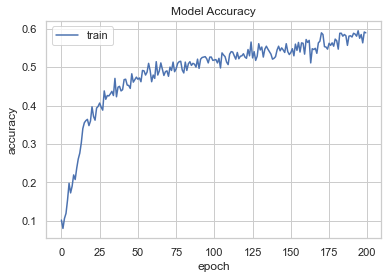

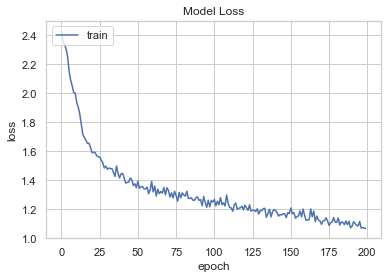

In [24]:
##########################
# # get model accuracy # #
##########################
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

######################
# # get model loss # #
######################
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

#### SAVE MODEL

In [25]:
##################
# # save model # #
##################
model.model.save(MODEL_PATH)

# LIVE TESTING
> Live test with new dataset to check if model function as it should

#### LOAD MODEL

In [26]:
##################
# # load model # #
##################

# model = create_model()
model = load_model(MODEL_PATH)

#### LOAD DATA
- Import new dataset to verify the model is able to predict accurately

In [27]:
# import unseen data
pred_df = pd.read_csv(ACTUAL_DATASET_PATH)
pred_df.head()

,Subject,Class,Sequence,D|0,I|0+1,PF|0+1,RF|0+1,D|1,I|1+2,PF|1+2,...,RF|6+7,D|7,I|7+8,PF|7+8,RF|7+8,D|8,I|8+9,PF|8+9,RF|8+9,D|9
0,andy,3,why margin,0.156546,0.305911,0.149060,0.149365,0.156852,0.276707,0.203404,...,0.211456,0.157810,0.181083,0.065032,0.023273,0.116051,0.152623,0.033008,0.036572,0.119616
1,andy,3,war encalm,0.160672,0.335976,0.110433,0.175304,0.225543,0.271715,0.103903,...,0.222109,0.189098,0.239651,0.133426,0.050553,0.106225,0.214052,0.070148,0.107827,0.143904
2,andy,4,hood whips,0.132462,0.183651,0.102099,0.051189,0.081552,0.254179,0.131667,...,0.060127,0.141966,0.191998,0.056452,0.050031,0.135546,0.240348,0.090543,0.104802,0.149805
3,andy,4,shim sweat,0.151514,0.161692,0.042774,0.010178,0.118918,0.178971,0.065487,...,0.203171,0.150809,0.246943,0.104717,0.096134,0.142226,0.237926,0.076469,0.095700,0.161457
4,andy,5,henry haji,0.128684,0.227950,0.091504,0.099266,0.136446,0.238963,0.099947,...,0.141130,0.160158,0.299132,0.167161,0.138973,0.131971,0.211203,0.059170,0.079232,0.152033


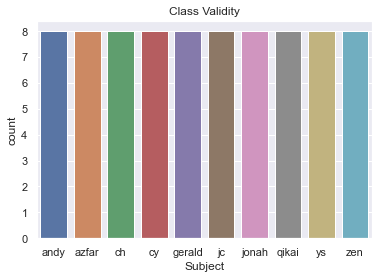

In [28]:
################################
# # check for class validity # #
################################
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Subject", data=pred_df).set_title("Class Validity")

# remove missing values if available
pred_df = pred_df.dropna()

In [29]:
pred_dataset = pred_df.values
results = pred_dataset[:,CLASSES_COL_NUM]

# # divide data into features X
# pred_row = pred_dataset[:,3:].astype(float)

#################################
# # predict more than one row # #
#################################

pred_row=pred_df.iloc[:,3:]

############################
# # predict a single row # #
############################

# pred_row=pred_df.iloc[11:12,3:]

##################
# # shape data # #
##################
pred_row = pred_row.values.tolist()
pred_arr = np.asarray(pred_row, dtype=np.float32)
pred_arr = np.reshape(pred_arr, (pred_arr.shape[0], TIMESTEPS, pred_arr.shape[1]))

Y = CLASS_LIST

Y = np.asarray(Y)
Y = Y.reshape(-1, 1)
lb = LabelBinarizer().fit(Y)
Y = lb.transform(Y)

In [30]:
####################################
# # get prediction and its label # #
####################################

pred_proba = model.predict(pred_arr)
pred = lb.inverse_transform(pred_proba)
acc = np.max(pred_proba, axis=1)

pred_results = np.column_stack((pred, acc))
pred_results = np.column_stack((results, pred_results))

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df = pd.DataFrame(data=pred_results, index=None, columns=['Results', 'Prediction', 'Accuracy'])
print(df)

df.to_csv("results.csv")

#=IF(EXACT(B2, C2), "Match", "Nope")​

   Results Prediction    Accuracy
0     andy       andy   0.9835091
1     andy       andy   0.9874135
2     andy       andy   0.9822583
3     andy       andy   0.9848643
4     andy       andy  0.98559433
5     andy      jonah  0.54695404
6     andy       andy  0.98700976
7     andy       andy   0.9743919
8    azfar      azfar    0.757829
9    azfar      azfar   0.4639436
10   azfar      azfar   0.5808677
11   azfar      azfar  0.74418473
12   azfar      azfar   0.4270279
13   azfar      azfar   0.5381294
14   azfar         cy   0.4778775
15   azfar        zen   0.6400337
16      ch         ch  0.42979214
17      ch         ch  0.37672648
18      ch         ys  0.37364128
19      ch         ch  0.43931246
20      ch         ys  0.47063503
21      ch         ch  0.37518787
22      ch         ys   0.4426484
23      ch         jc   0.3265777
24      cy      azfar  0.73170424
25      cy        zen  0.34133112
26      cy         cy  0.44196975
27      cy         cy  0.65188146
28      cy    